In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Configs

In [3]:
INPUT_PATH = 'data/labels.parquet'

# Load Data

In [5]:
labels_df = pd.read_parquet(INPUT_PATH)
print(f'labels_df shape is {labels_df.shape}')
labels_df.head()

labels_df shape is (125760, 4)


,Location,Date,Time,Demand
0,1,2023-01-01,midnight,1
1,1,2023-01-01,morning,5
2,1,2023-01-01,noon,27
3,1,2023-01-01,night,7
4,1,2023-01-02,midnight,5


# General Info

## Finding Important Locations

In [27]:
def plot_cumsum_demand(labeled_df, target_demand):
    grouped_df = labeled_df.groupby('Location')['Demand'].sum().reset_index().sort_values(by='Demand', ascending=False).reset_index()
    cumulative_demand = (grouped_df['Demand'].cumsum() / grouped_df['Demand'].sum()).to_numpy()

    plt.plot(range(1,263), cumulative_demand)
    plt.xlabel('Location numbers')
    plt.ylabel('Cumulative Demand')
    plt.title('Cumulative Demand by Location')
    target_x = (cumulative_demand <= target_demand).argmin()
    plt.axhline(y=target_demand, color='r', linestyle='--', label=f'Target Demand ({target_demand})')
    plt.axvline(x=target_x, color='g', linestyle='--', label=f'Target Location ({target_x})')

    plt.legend() 
    plt.show()
    important_locations = grouped_df.iloc[:target_x, grouped_df.columns.get_loc('Location')]
    important_locations = important_locations.to_numpy()
    return important_locations

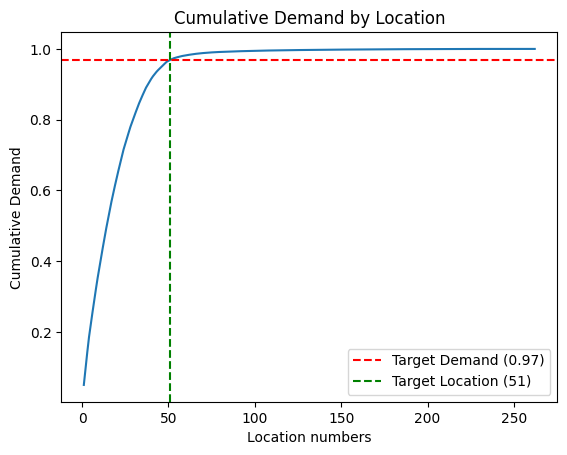

In [28]:
important_locations = plot_cumsum_demand(labels_df, 0.97)

# Visualization

In [51]:
def visualize_locations(data_df, location_ids):
    colors = {'midnight': 'red', 'morning': 'blue', 'noon': 'green', 'night': 'purple'}

    fig, axes = plt.subplots(nrows=len(location_ids) // 2 + 1, ncols=2, figsize=(20,140))
    for i, ax in enumerate(axes.flat):
        try:
            location_df = data_df[data_df['Location'] == location_ids[i]]
        except IndexError:
            continue

        for time, color in colors.items():
            time_df = location_df[location_df['Time'] == time]
            ax.scatter(time_df['Date'], time_df['Demand'], color=color, s=15 ,label=time)

        ax.set_xlabel('Date')
        ax.set_ylabel('Demand')
        ax.set_title('Location ' + str(location_ids[i]))
        ax.legend(fontsize=10)


        month_locator = MonthLocator()
        ax.xaxis.set_major_locator(month_locator)
        date_formatter = DateFormatter('%Y-%m')
        ax.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=45)

    plt.show()

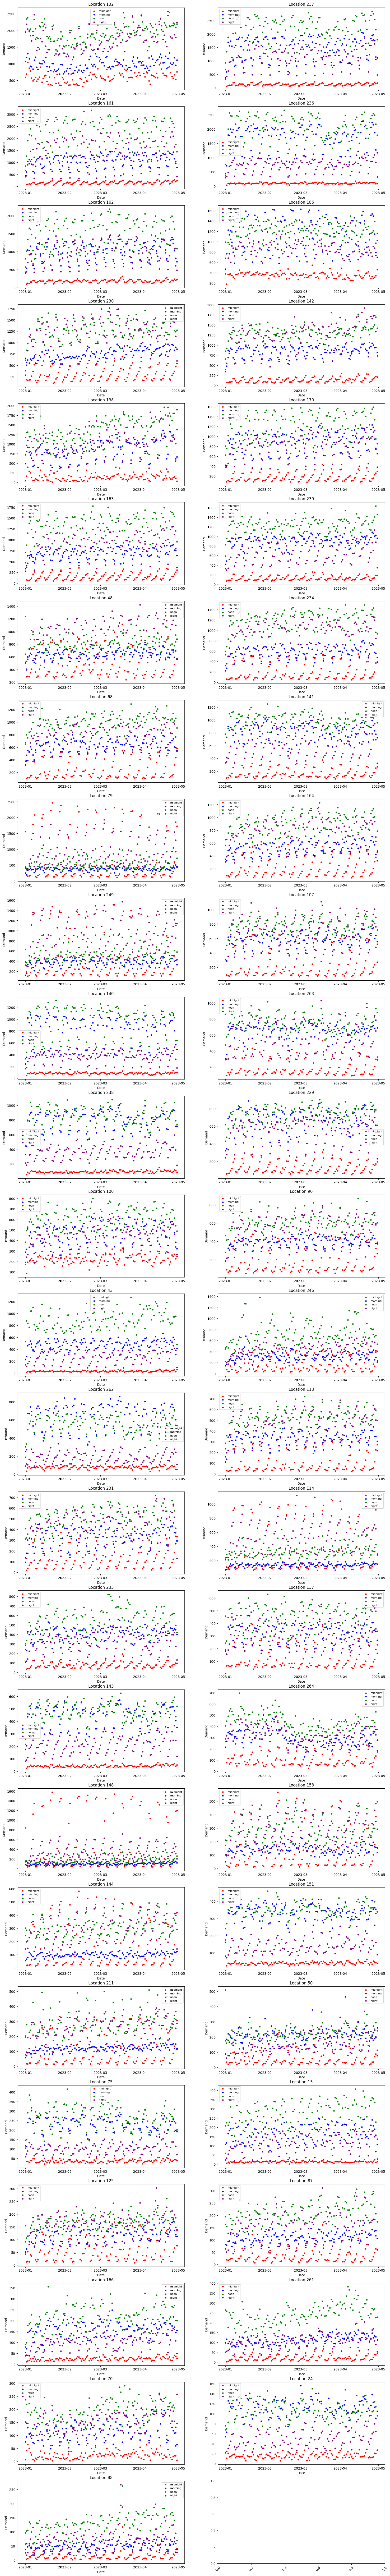

In [52]:
visualize_locations(labels_df, important_locations)